## This file has been modified based on new understandings and methodologies since the original implementation (2 years later)

## Assessment of Adolescent Maternal Mortality by Region

### How do the Region Mean Adolescent Ages Compare to the Mexico's National Mean Adolescent Age Maternal Mortality?  
- The World Health Organization (WHO) states that an upwards of 13 million *adolescent girls (ages under 20)* give birth every year, and complications from those pregnancies and childbirth are a leading cause of death for those young mothers. 

In [1]:
# Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import pylab as pl
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statistics

In [2]:
# Load datasets
%store -r  materna
%store -r res_dataset

In [3]:
# Create an adolescent sub dataframe from materna
adolescent_matern_mortality = materna[materna['Age at Death'] <= 20 ]
adolescent_matern_mortality.head()

,Residence Code,Residence Name,Local Size Code,Education Completed,Age at Death,Received(0)/Not(1) Medical Assistance
0,7,Chiapas,1,2,11,0.0
1,30,Veracruz de Ignacio de la Llave,11,3,12,0.0
2,27,Tabasco,14,4,12,0.0
3,15,México,4,5,12,0.0
4,12,Guerrero,4,2,12,1.0


#### Create variables for age distribution by region

In [4]:
# Create a variable for adolescent_ages_maternal_mortality
adolescent_ages = adolescent_matern_mortality['Age at Death']

# Create a variable for adolsecent_sample_size
adolsecent_sample_size = len(adolescent_ages)
adolsecent_sample_size

2885

### Visualize Data

/Users/emily-work/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


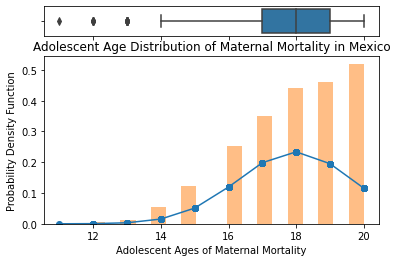

'The sample(n=2885) population mean age of adolescent maternal mortality is 17.98 years old with a standard deviation of 1.71.'

In [5]:
# Create a figure with two plots
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add boxplot for maternal death
sns.boxplot(adolescent_ages, ax=boxplot)

# Remove x-axis label from boxplot
boxplot.set(xlabel='')

# Add histogram and normal curve for maternal death
fit = stats.norm.pdf(adolescent_ages, np.mean(adolescent_ages), np.std(adolescent_ages))
pl.plot(adolescent_ages, fit, '-o')
pl.hist(adolescent_ages, density=True, alpha=0.5, bins=20)

# Label axis 
pl.xlabel('Adolescent Ages of Maternal Mortality')
pl.ylabel('Probability Density Function')
pl.title('Adolescent Age Distribution of Maternal Mortality in Mexico')

# Show plot and add print mean and std sample information
plt.show()
'The sample(n=' + str(adolsecent_sample_size) + ') population mean age of adolescent maternal mortality is ' + str(round(np.mean(adolescent_ages), 2)) + ' years old with a standard deviation of ' + str(round(np.std(adolescent_ages), 2)) + '.'

*Preliminary Observation*: The distribution appears to have a skewed-right distributed based off of the histogram and boxplot of instance of adolescent maternal mortality. 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(1, 0, 'Aguascalientes'),
  Text(2, 0, 'Baja California'),
  Text(3, 0, 'Baja California Sur'),
  Text(4, 0, 'Campeche'),
  Text(5, 0, 'Chiapas'),
  Text(6, 0, 'Chihuahua'),
  Text(7, 0, 'Coahuila de Zaragoza'),
  Text(8, 0, 'Colima'),
  Text(9, 0, 'Distrito Federal'),
  Text(10, 0, 'Durango'),
  Text(11, 0, 'Guanajuato'),
  Text(12, 0, 'Guerrero'),
  Text(13, 0, 'Hidalgo'),
  Text(14, 0, 'Jalisco'),
  Text(15, 0, 'Michoacán de Ocampo'),
  Text(16, 0, 'Morelos'),
  Text(17, 0, 'México'),
  Text(18, 0, 'Nayarit'),
  Text(19, 0, 'Nuevo León'),
  Text(20, 0, 'Oaxaca'),
  Text(21, 0, 'Puebla'),
  Text(22, 0, 'Querétaro Arteaga'),
  Text(23, 0, 'Quintana Roo'),
  Text(24, 0, 'San Luis Potosí'),
  Text(25, 0, 'Sinaloa'),
  Text(26, 0, 'Sonora'),
  Text(27, 0, 'Tabasco'),
  Text(28, 0, 'Tamaulipas'),
  Text(29, 0, 'Tlaxcala'),
  Text(30, 0, 'V

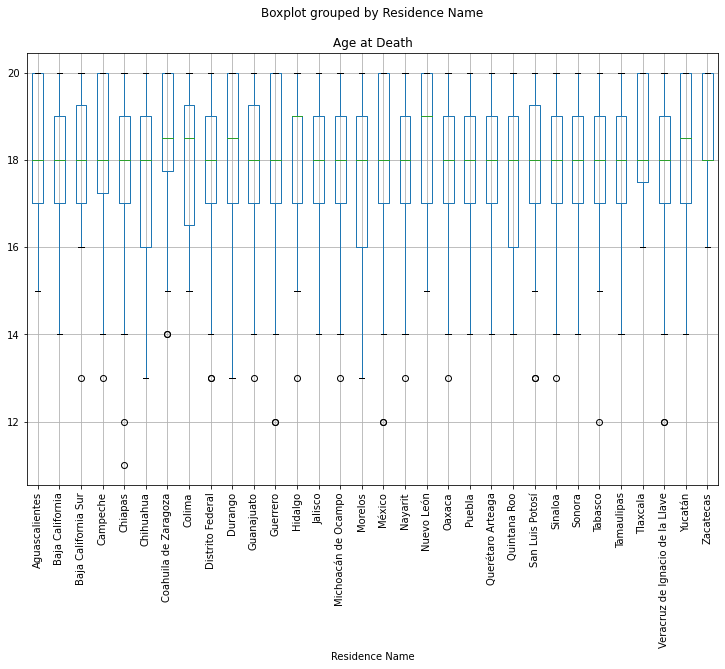

In [6]:
#Create a boxplot
adolescent_matern_mortality.boxplot('Age at Death', by='Residence Name', figsize=(12, 8))
plt.xticks(rotation='vertical')

*Preliminary Observations*: When visualizing the spread of adolescent maternal mortality by region, it appears there there are several regions with outliers of very young ages of maternal mortality. Since outliers not incorporated in the calculation of the mean, the adolescent age arrays should be added to the res_dataset and included in the Linear Regression analysis.

### Bootstrap Simulation: Compare the Sample Mean to a Statistically-Likely Population Mean

#### Statistical Testing of Data Mean Adolescent Mortality

$H$o: The mean adolescent age of maternal mortality in Mexico is equal to the mean adolescent age of maternal mortality presented in the dataset ($17.98 yoa$). <br>  Empirical Mean ($μ$) − Population Mean ($μ$) = 0

$H$a: The mean adolescent age of maternal mortality in Mexico is *not* equal to the mean adolescent age of maternal mortality presented in the dataset ($17.98 yoa$). <br> Empirical Mean ($μ$) − Population Mean ($μ$) ≠ 0

Significance Level: *95%* Confidence. <br> $α$ = 0.05

In [7]:
# Create variables for sample statistical information
adolescent_ages_std = adolescent_ages.std()
mean_adolescent_ages = adolescent_ages.mean()

# Create an array of the sample mean that is equal to the boostrap array length
adolescent_ages_arr = np.full(10000, mean_adolescent_ages)

print('sample size: ', adolsecent_sample_size)
print('sample mean age of death: ', mean_adolescent_ages)
print('sample standard deviation: ', adolescent_ages_std)

sample size:  2885
sample mean age of death:  17.97677642980936
sample standard deviation:  1.7061774866899995


In [8]:
# Bootstrap replicate function for repeatability
def bootstrap_replicate_1d(data, func):
    """Create a bootstrap replicates."""
    
    boot_sample = np.random.choice(data, size=len(data))  # create bootstrap sample
    return func(boot_sample) # apply function to bootstrap

# Apply bootstrap replicate function 'n' and return an array
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    boot_rep = np.empty(size) # initialize array of replicates: bs_replicates
    for i in range(size):  # generate 'n' number of replicates
        boot_rep[i] = bootstrap_replicate_1d(data, func)
    return boot_rep

In [9]:
# Create 10000 bootstrap replicates of the mean and take the mean of the returned array
boot_tenthousand =  draw_bs_reps(adolescent_ages, np.mean, size=10000)
print('bootstrap mean adolescent age of death: ' + str(np.mean(boot_tenthousand)))

bootstrap mean adolescent age of death: 17.976786828422878


In [10]:
# Compute p-value
p_val = np.sum(boot_tenthousand >= adolescent_ages_arr) / len(boot_tenthousand)
print('p-value: {0:0.4f}'.format(p_val))

# Calculate the standard margin of error for a 95% confidence interval
conf_int_low = mean_adolescent_ages-(1.98*(adolescent_ages_std/math.sqrt(adolsecent_sample_size)))
conf_int_high = mean_adolescent_ages+(1.98*(adolescent_ages_std/math.sqrt(adolsecent_sample_size)))
print('95% Confidence Interval: [{0:0.4f}  {1:0.4f}]'.format(conf_int_low, conf_int_high))

p-value: 0.5072
95% Confidence Interval: [17.9139  18.0397]


**Conclusion from the Bootstrap Hypothesis Test:** The resulting population mean of maternal death approximation based on 10,000 bootstrap replicate samples was *17.9765 years of age (yoa)*, which is close to the sample mean of *17.9767 (yoa)* from the dataset. Additionally, the bootstrap population mean is within the 95% Confidence Interval, *17.9139 to 18.0397 (yoa)* with a p-value of 0.4990, which is greater than α = 0.05. Therefore, the null hypothesis that the mean age of death of maternal women in Mexico is equal to the mean age of death presented in the dataset can be accepted. **$Ho$ is accepted**.

In [11]:
#Create a dict variable for key:value pairs of state:age_array
grps = pd.unique(adolescent_matern_mortality['Residence Name'].values)
state_mean_adolescent_ages = {grp:adolescent_matern_mortality['Age at Death'][adolescent_matern_mortality['Residence Name'] == grp] for grp in grps}

In [12]:
# Create an empty list to store mean age and sample size of maternal death per region
ado_region_mean = []
ado_region_n = []

# Create an iteration function
for i in adolescent_matern_mortality['Residence Code'].sort_values().unique():
    """Calculate Mean Age Adolescent Maternal Mortality per Region"""
    
    sub_df = adolescent_matern_mortality[adolescent_matern_mortality['Residence Code'] == i]
    age = sub_df['Age at Death']
    ado_n = len(age)  # sample length
    ado_mean = age.mean() # calculate mean
    
    for region in sub_df['Residence Name'].unique(): # prevent repeat entries in lists
        ado_region_mean.append(round(ado_mean, 2)) #  append mean to region list
        ado_region_n.append(round(ado_n, 2)) # append ado_n to region list

In [13]:
# Test output
len(ado_region_mean), ado_region_mean[31], len(ado_region_n), ado_region_n[31]

(32, 18.52, 32, 23)

In [14]:
# Convert the list to a Series and add as new column
res_dataset['μ Age Adolescent Maternal Death'] = pd.Series(ado_region_mean, index=np.arange(1,33))
res_dataset['Region Ado (n)'] = pd.Series(ado_region_n, index=np.arange(1,33))
res_dataset.head()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Region Education Level,μ Region Local Community Size,μ Presence(0)/Not(1) of Med Assist,μ Age Adolescent Maternal Death,Region Ado (n)
1,Aguascalientes,28.36,127.0,55.16,0,4.56,10.42,0.16,18.08,25
2,Baja California,27.15,361.0,46.31,1,4.42,13.35,0.16,18.00,69
3,Baja California Sur,27.56,66.0,55.37,1,4.83,8.50,0.16,18.00,16
4,Campeche,26.87,126.0,44.29,1,4.12,6.56,0.14,18.00,22
5,Chiapas,28.02,310.0,45.02,1,4.75,11.22,0.12,18.33,52


In [15]:
# Test output
res_dataset.tail()

,Region,μ Age Maternal Mortality,Region (n),μ Age Variance,Above(0) or Below(1) Average,μ Region Education Level,μ Region Local Community Size,μ Presence(0)/Not(1) of Med Assist,μ Age Adolescent Maternal Death,Region Ado (n)
28,Tamaulipas,28.26,377.0,45.45,0,4.47,11.52,0.13,17.88,59
29,Tlaxcala,28.45,178.0,55.16,0,4.82,5.90,0.18,18.37,35
30,Veracruz de Ignacio de la Llave,27.94,1239.0,53.60,1,3.69,5.10,0.13,17.95,236
31,Yucatán,27.50,258.0,54.89,1,3.72,7.71,0.19,18.12,58
32,Zacatecas,27.50,191.0,48.10,1,4.35,5.84,0.08,18.52,23


In [16]:
# Store as a global variable 
%store res_dataset

Stored 'res_dataset' (DataFrame)
